In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('all_data_copy.csv')

In [3]:
df = ( 
    df
    .drop(df.loc[df['Product'] == 'Product'].index) # Some rows have the header names 
    
    .dropna(how='all')                              #these are entire rows with nan values
    
    .rename(columns = {'Order ID': 'Order_id', 'Quantity Ordered': 'Quantity_ordered',
                        'Price Each':'Price_each','Order Date':'Order_date',
                        'Purchase Address':'Purchase_address'})
            )
    

In [4]:
'''
Creating a dataframe with month colums extracted form Purchased_date column
Creating City and State column from Purchase address columns
Creating hr and minutes columns form Purchase_sate for further time series analysis
Also converted the datatypes for better memory optimization
'''

x=(
df.assign( 
            Sales = df['Price_each'].astype('float32') * df['Quantity_ordered'].astype('int8'),
            Hour = df['Order_date'].apply(lambda x : x.split(' ')[1].split(':')[0]).astype('int16'),
            Mintute = df['Order_date'].apply(lambda x : x.split(' ')[1].split(':')[1]).astype('int16'),
            Month = df['Order_date'].str[0:2].astype('int8'),
            Date = df['Order_date'].apply(lambda x : x.split(' ')[0]),
            City= df['Purchase_address'].apply(lambda x : x.split(',')[1]).astype(str),
            State = df['Purchase_address'].apply(lambda x : x.split(',')[2].split(' ')[1]).astype(str))#Memory after adding city and state columns 
            
    #.memory_usage(deep = True).sum() 

    .drop('Order_date', axis=1) # 62856063
    .drop('Purchase_address', axis=1) #45965896
    .astype({'Order_id':'int32', 'Price_each':'float32', 'Quantity_ordered':'int8'})
    
    #.memory_usage(deep = True).sum() 
    #.dtypes
    
    
)

In [45]:
x.Product.unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [100]:
def plot_product_sale(product):
    a= x.loc[df['Product'] == product]
    m=a.pivot_table(index='Month', values='Sales',aggfunc='sum').reset_index()
    d=a.pivot_table(index='Date', values='Sales',aggfunc='sum').reset_index()
    m.plot.line('Month','Sales')
    d.plot.line('Date','Sales')
    plt.xticks(rotation=90)
    plt.show()

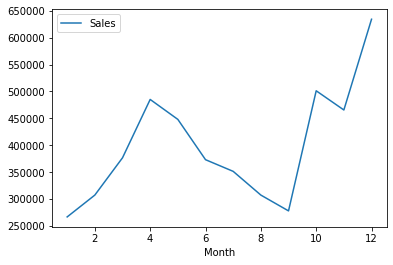

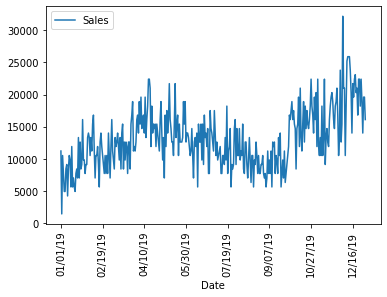

In [104]:
plot_product_sale('iPhone')